### Import libraries

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Read the dataset

In [120]:
train = pd.read_csv("2018-05-17-Recruit-Sample-Data-Train1.csv")
train.head()

,SetID,Time of Application,State,Monthly Net Income,Paycheck Net Income,Rent or Own,Months at Residence,Bank Account Months,Pay Cycle,Loan Amount,Loan Funded Date,Loan Due Date,First Payment Default,First Payment Default1,Time_Diff
0,436,2018-03-28T17:27:35Z,CA,2000.0,2000.0,R,12,6,Monthly,300.00,3/28/2018,4/11/2018,False,0,14
1,615,2018-03-23T13:19:32Z,TX,3500.0,3500.0,R,60,60,Monthly,641.91,3/23/2018,4/6/2018,False,0,14
2,1251,2018-02-28T12:04:56Z,CA,3000.0,3000.0,R,0,6,Monthly,117.65,2/28/2018,3/30/2018,True,1,30
3,440,2018-03-28T15:47:59Z,CA,1500.0,1500.0,R,12,6,Monthly,117.65,3/28/2018,4/28/2018,False,0,31
4,1692,2018-02-13T04:36:00Z,CA,2392.0,598.0,R,130,36,Weekly,300.00,2/13/2018,2/23/2018,False,0,10


In [121]:
train.shape

(1600, 15)

### Convert Object type to Datetime and extract Month, Day and Hour

In [122]:
train["Time_of_application"] = pd.to_datetime(train['Time of Application'])

In [123]:
## Drop the original 'Time of Application' column
train = train.drop(['Time of Application'], axis =1)

In [124]:
train['Month_only']= train['Time_of_application'].dt.month
train['Day_only']= train['Time_of_application'].dt.day
train['Hour_only']= train['Time_of_application'].dt.hour

In [125]:
train.head()

,SetID,State,Monthly Net Income,Paycheck Net Income,Rent or Own,Months at Residence,Bank Account Months,Pay Cycle,Loan Amount,Loan Funded Date,Loan Due Date,First Payment Default,First Payment Default1,Time_Diff,Time_of_application,Month_only,Day_only,Hour_only
0,436,CA,2000.0,2000.0,R,12,6,Monthly,300.00,3/28/2018,4/11/2018,False,0,14,2018-03-28 17:27:35,3,28,17
1,615,TX,3500.0,3500.0,R,60,60,Monthly,641.91,3/23/2018,4/6/2018,False,0,14,2018-03-23 13:19:32,3,23,13
2,1251,CA,3000.0,3000.0,R,0,6,Monthly,117.65,2/28/2018,3/30/2018,True,1,30,2018-02-28 12:04:56,2,28,12
3,440,CA,1500.0,1500.0,R,12,6,Monthly,117.65,3/28/2018,4/28/2018,False,0,31,2018-03-28 15:47:59,3,28,15
4,1692,CA,2392.0,598.0,R,130,36,Weekly,300.00,2/13/2018,2/23/2018,False,0,10,2018-02-13 04:36:00,2,13,4


### Flag Variable:

In [126]:
train['time_part_only']= pd.to_datetime(train['Time_of_application'], format = '%H:%M:%S').dt.time.astype(str)
train['application_time_flag']= train['time_part_only'].apply(lambda x: 1 if x >= '08:00:00' and x <= '18:00:00' else (0))

In [127]:
# drop time_part_only column
train = train.drop(['time_part_only'], axis =1)

In [128]:
train['application_time_flag'].value_counts()

1    1249
0     351
Name: application_time_flag, dtype: int64

### Data Preprocessing

### Check for Duplicates ID:

In [129]:
counts = train['SetID'].value_counts()
train[train['SetID'].isin(counts.index[counts > 1])]

,SetID,State,Monthly Net Income,Paycheck Net Income,Rent or Own,Months at Residence,Bank Account Months,Pay Cycle,Loan Amount,Loan Funded Date,Loan Due Date,First Payment Default,First Payment Default1,Time_Diff,Time_of_application,Month_only,Day_only,Hour_only,application_time_flag


This shows that we dont have any duplicates ID in the dataset, therefore ID is the unique key on the givendataset.

### Missing value assesment :

### Observe data types with missing values

In [130]:
train.info() ##or train.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 19 columns):
SetID                     1600 non-null int64
State                     1600 non-null object
Monthly Net Income        1600 non-null float64
Paycheck Net Income       1600 non-null float64
Rent or Own               1600 non-null object
Months at Residence       1600 non-null int64
Bank Account Months       1600 non-null int64
Pay Cycle                 1600 non-null object
Loan Amount               1600 non-null float64
Loan Funded Date          1600 non-null object
Loan Due Date             1600 non-null object
First Payment Default     1600 non-null bool
First Payment Default1    1600 non-null int64
Time_Diff                 1600 non-null int64
Time_of_application       1600 non-null datetime64[ns]
Month_only                1600 non-null int64
Day_only                  1600 non-null int64
Hour_only                 1600 non-null int64
application_time_flag     1600 non-null int64


In [131]:
train.nunique()

SetID                     1600
State                        2
Monthly Net Income         502
Paycheck Net Income        492
Rent or Own                  2
Months at Residence        226
Bank Account Months         55
Pay Cycle                    4
Loan Amount                113
Loan Funded Date            73
Loan Due Date               76
First Payment Default        2
First Payment Default1       2
Time_Diff                   26
Time_of_application       1590
Month_only                   4
Day_only                    31
Hour_only                   24
application_time_flag        2
dtype: int64

In [132]:
train.isnull().any().any()

False

In [133]:
train.isnull().any().sum()

0

In [134]:
train.isnull().any()

SetID                     False
State                     False
Monthly Net Income        False
Paycheck Net Income       False
Rent or Own               False
Months at Residence       False
Bank Account Months       False
Pay Cycle                 False
Loan Amount               False
Loan Funded Date          False
Loan Due Date             False
First Payment Default     False
First Payment Default1    False
Time_Diff                 False
Time_of_application       False
Month_only                False
Day_only                  False
Hour_only                 False
application_time_flag     False
dtype: bool

In [135]:
train['Day_only'].value_counts()

5     124
12     85
9      83
26     76
8      73
2      73
14     71
1      69
27     68
13     66
15     62
20     61
6      60
3      59
22     57
28     53
4      51
7      50
19     47
23     44
21     42
31     37
29     31
25     27
16     25
24     22
10     21
30     21
17     18
18     14
11     10
Name: Day_only, dtype: int64

In [80]:
train.describe()

,SetID,Monthly Net Income,Paycheck Net Income,Months at Residence,Bank Account Months,Loan Amount,First Payment Default1,Time_Diff
count,1600.0000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,1004.8700,4362.641250,2718.488750,63.285625,24.731250,317.974619,0.265625,16.117500
std,584.0755,5524.868265,4894.909919,70.777592,23.414134,176.993218,0.441804,6.725285
min,2.0000,70.000000,70.000000,0.000000,3.000000,117.650000,0.000000,6.000000
25%,492.7500,2000.000000,1250.000000,17.000000,6.000000,235.300000,0.000000,11.000000
50%,1012.5000,3200.000000,2100.000000,39.000000,24.000000,300.000000,0.000000,15.000000
75%,1514.2500,5139.000000,3500.000000,81.000000,36.000000,320.592500,1.000000,20.000000
max,2000.0000,184000.000000,184000.000000,690.000000,410.000000,644.240000,1.000000,31.000000


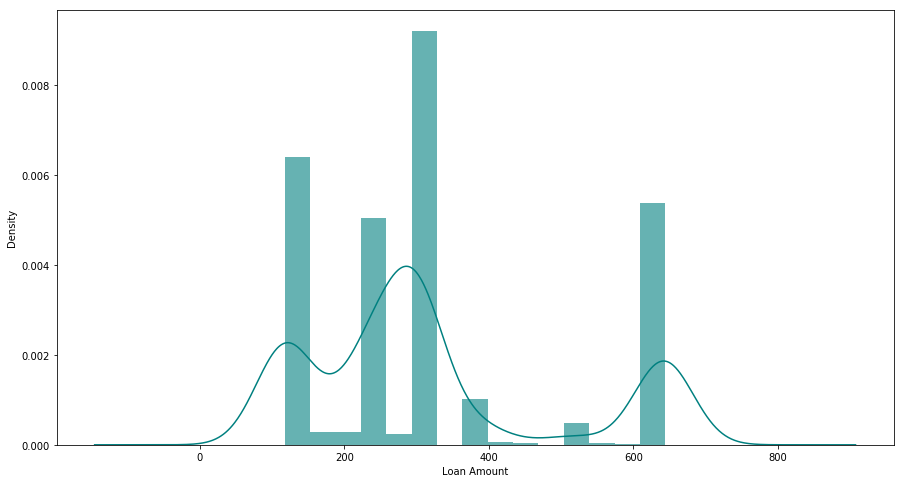

In [137]:
plt.figure(figsize=(15,8))
ax = train["Loan Amount"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train["Loan Amount"].plot(kind='density', color='teal')
ax.set(xlabel='Loan Amount')
plt.show()

### Dependent Variable Distribution:

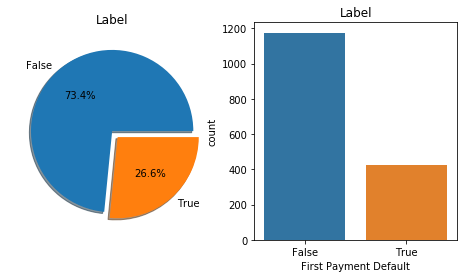

In [138]:
f,ax = plt.subplots(1,2, figsize= (8,4))
train['First Payment Default'].value_counts().plot.pie(explode=[0,0.1], autopct = '%1.1f%%', ax= ax[0], shadow= True)
ax[0].set_title("Label")
ax[0].set_ylabel('')
sns.countplot('First Payment Default', data = train, ax= ax[1])
ax[1].set_title('Label')
plt.show()

we observed that distribution of classes (False/True) is skewed so we need to do stratified sampling approach while training the model.

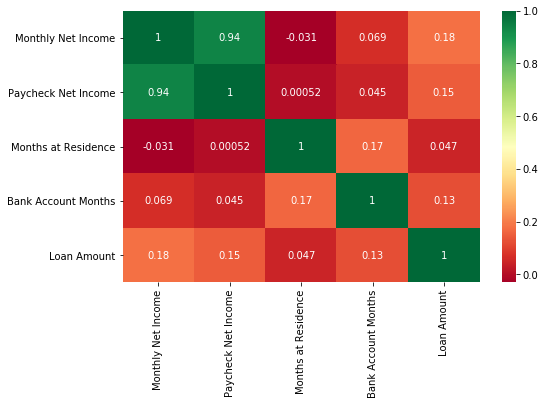

In [139]:
continuous_features = ['Monthly Net Income', 'Paycheck Net Income', 'Months at Residence', 'Bank Account Months', 'Loan Amount']
X = train[continuous_features]
plt.subplots(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

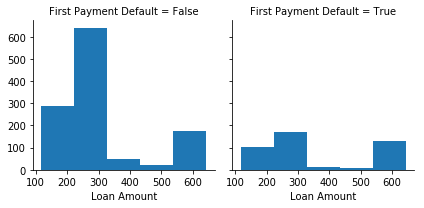

In [140]:
g = sns.FacetGrid(train, col='First Payment Default')
g.map(plt.hist, 'Loan Amount', bins=5)

C:\Users\rc_as\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\rc_as\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


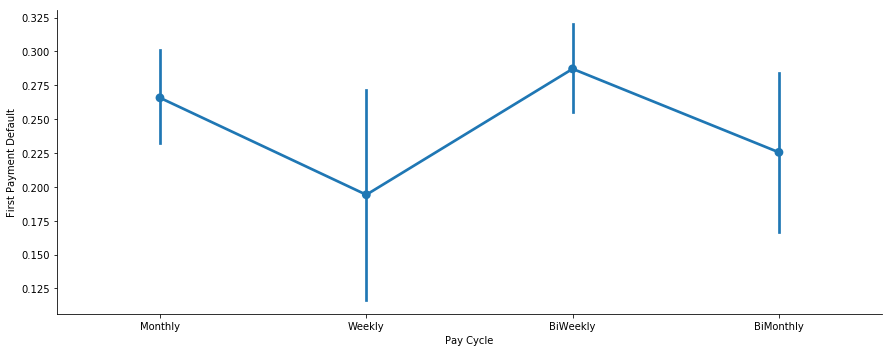

In [142]:
axes = sns.factorplot('Pay Cycle','First Payment Default', data=train, aspect = 2.5, )

### Create the list of Columns Family:

In [145]:
train.dtypes

SetID                              int64
State                             object
Monthly Net Income               float64
Paycheck Net Income              float64
Rent or Own                       object
Months at Residence                int64
Bank Account Months                int64
Pay Cycle                         object
Loan Amount                      float64
Loan Funded Date                  object
Loan Due Date                     object
First Payment Default               bool
First Payment Default1             int64
Time_Diff                          int64
Time_of_application       datetime64[ns]
Month_only                         int64
Day_only                           int64
Hour_only                          int64
application_time_flag              int64
dtype: object

In [81]:
train1=train.drop(columns=['SetID','Time of Application','First Payment Default','Loan Due Date','Loan Funded Date'])
train1.head()

,State,Monthly Net Income,Paycheck Net Income,Rent or Own,Months at Residence,Bank Account Months,Pay Cycle,Loan Amount,First Payment Default1,Time_Diff
0,CA,2000.0,2000.0,R,12,6,Monthly,300.00,0,14
1,TX,3500.0,3500.0,R,60,60,Monthly,641.91,0,14
2,CA,3000.0,3000.0,R,0,6,Monthly,117.65,1,30
3,CA,1500.0,1500.0,R,12,6,Monthly,117.65,0,31
4,CA,2392.0,598.0,R,130,36,Weekly,300.00,0,10


### Converting string into categorical variables in Train data

In [82]:
mymap ={'CA':1, 'TX':2, 'R':1, 'O':'2', 'Weekly':1,'BiWeekly':2,'Monthly':3,'BiMonthly':4}
train2 = train1.applymap(lambda s: mymap.get(s) if s in mymap else s)
train2.head()

,State,Monthly Net Income,Paycheck Net Income,Rent or Own,Months at Residence,Bank Account Months,Pay Cycle,Loan Amount,First Payment Default1,Time_Diff
0,1,2000.0,2000.0,1,12,6,3,300.00,0,14
1,2,3500.0,3500.0,1,60,60,3,641.91,0,14
2,1,3000.0,3000.0,1,0,6,3,117.65,1,30
3,1,1500.0,1500.0,1,12,6,3,117.65,0,31
4,1,2392.0,598.0,1,130,36,1,300.00,0,10


In [84]:
class_count=train.groupby('First Payment Default1').size()
print(class_count)

First Payment Default1
0    1175
1     425
dtype: int64


In [ ]:
train2.plot.box() 
#train2.plot(kind='box',subplots=True,layout=(3,3),sharex=False,sharey=False)

## Analyzing by visualization of data

### Observing Correlation of variables

In [85]:
train2.corr()

,State,Monthly Net Income,Paycheck Net Income,Months at Residence,Bank Account Months,Pay Cycle,Loan Amount,First Payment Default1,Time_Diff
State,1.000000,0.193677,0.162404,-0.055095,0.019691,0.095541,0.831175,0.116733,0.001078
Monthly Net Income,0.193677,1.000000,0.936308,-0.030648,0.069021,-0.025316,0.179618,0.082547,-0.116471
Paycheck Net Income,0.162404,0.936308,1.000000,0.000516,0.045390,0.082779,0.148856,0.068984,0.032979
Months at Residence,-0.055095,-0.030648,0.000516,1.000000,0.166267,0.007976,0.046890,-0.028628,-0.026228
Bank Account Months,0.019691,0.069021,0.045390,0.166267,1.000000,0.013263,0.125348,-0.037772,-0.047653
Pay Cycle,0.095541,-0.025316,0.082779,0.007976,0.013263,1.000000,0.077226,-0.015944,0.304748
Loan Amount,0.831175,0.179618,0.148856,0.046890,0.125348,0.077226,1.000000,0.126960,-0.051239
First Payment Default1,0.116733,0.082547,0.068984,-0.028628,-0.037772,-0.015944,0.126960,1.000000,0.032006
Time_Diff,0.001078,-0.116471,0.032979,-0.026228,-0.047653,0.304748,-0.051239,0.032006,1.000000


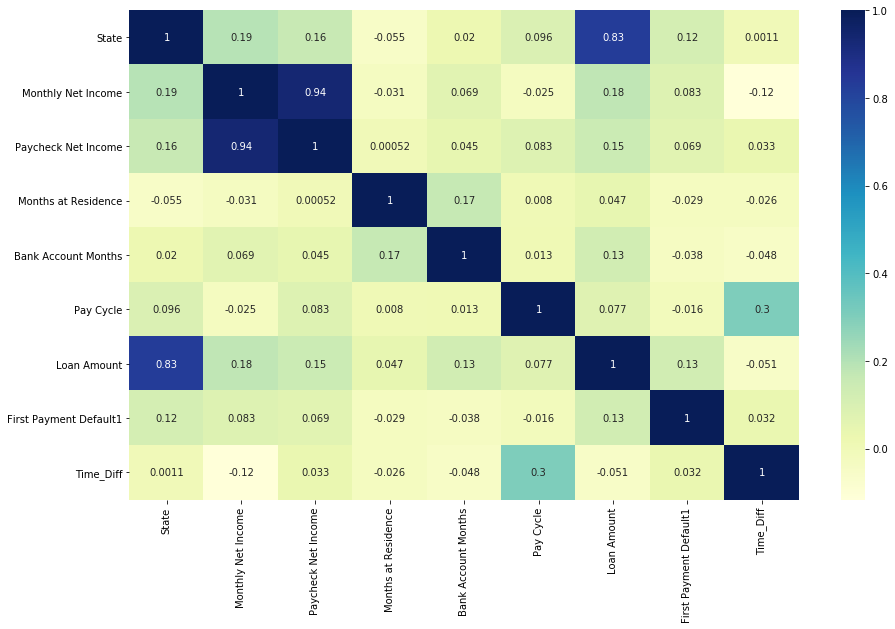

In [86]:
plt.figure(figsize=(15,9))
sns.heatmap(train2.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [ ]:
g = sns.relplot(x="State", y="Loan Amount", kind="line", data=train)
g.fig.autofmt_xdate

<bound method Figure.autofmt_xdate of <Figure size 360x360 with 1 Axes>>

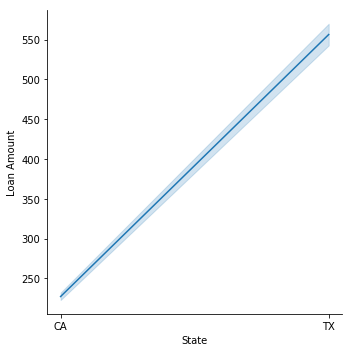

In [49]:
g = sns.relplot(x="State", y="Loan Amount", kind="line", data=train)
g.fig.autofmt_xdate

<bound method Figure.autofmt_xdate of <Figure size 360x360 with 1 Axes>>

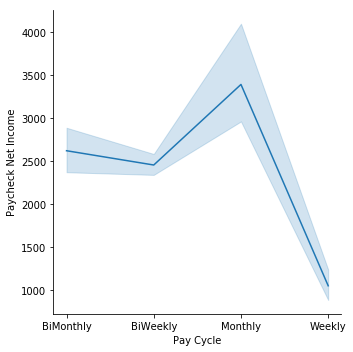

In [53]:
g = sns.relplot(x="Pay Cycle", y="Paycheck Net Income", kind="line", data=train)
g.fig.autofmt_xdate

<bound method Figure.autofmt_xdate of <Figure size 360x360 with 1 Axes>>

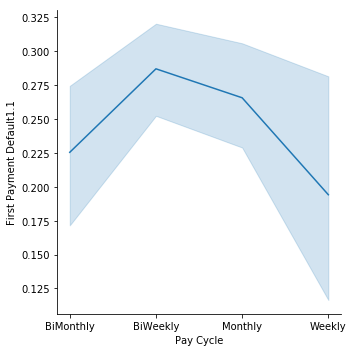

In [55]:
g = sns.relplot(x="Pay Cycle", y="First Payment Default1.1", kind="line", data=train)
g.fig.autofmt_xdate

<bound method Figure.autofmt_xdate of <Figure size 360x360 with 1 Axes>>

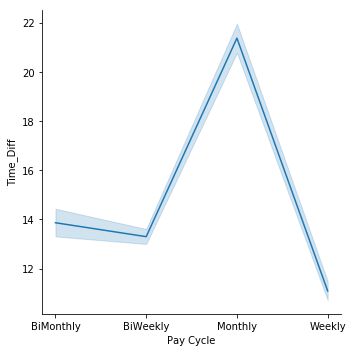

In [56]:
g = sns.relplot(x="Pay Cycle", y="Time_Diff", kind="line", data=train)
g.fig.autofmt_xdate

<bound method Figure.autofmt_xdate of <Figure size 360x360 with 1 Axes>>

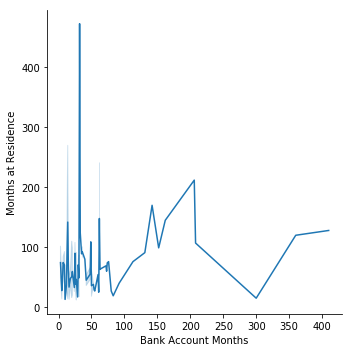

In [57]:
g = sns.relplot(x="Bank Account Months", y="Months at Residence", kind="line", data=train)
g.fig.autofmt_xdate

<bound method Figure.autofmt_xdate of <Figure size 360x360 with 1 Axes>>

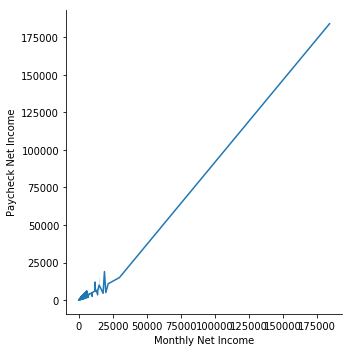

In [89]:
g = sns.relplot(x="Monthly Net Income", y="Paycheck Net Income", kind="line", data=train)
g.fig.autofmt_xdate

<bound method Figure.autofmt_xdate of <Figure size 360x360 with 1 Axes>>

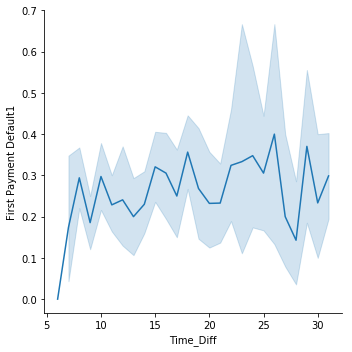

In [91]:
g = sns.relplot(x="Time_Diff", y="First Payment Default1", kind="line", data=train)
g.fig.autofmt_xdate

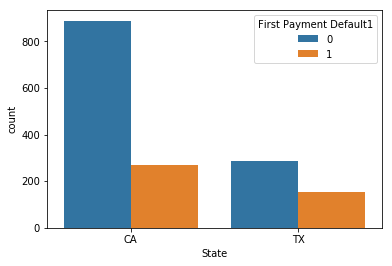

In [92]:
sns.countplot(data=train,x='State',hue='First Payment Default1')

### In both States, more people do not pay first time.

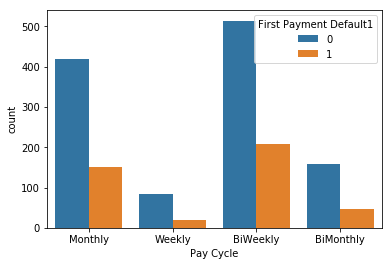

In [95]:
sns.countplot(data=train,x='Pay Cycle',hue='First Payment Default1')

### Relatively people with weekly cycle do not take loan but loan takers for BiWeekly customers is maximum. 
### More people with BiWeekly PayCycle do not pay first time.

## Where 'CA':1, 'TX':2, 'R':1, 'O':'2'

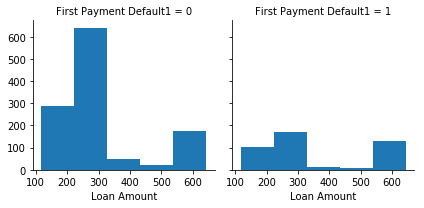

In [96]:
g = sns.FacetGrid(train2, col='First Payment Default1')
g.map(plt.hist, 'Loan Amount', bins=5)

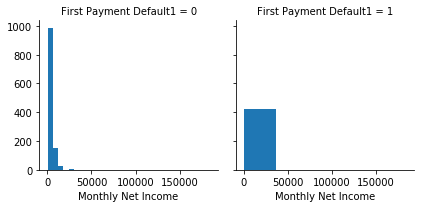

In [97]:
g = sns.FacetGrid(train2, col='First Payment Default1')
g.map(plt.hist, 'Monthly Net Income', bins=5)

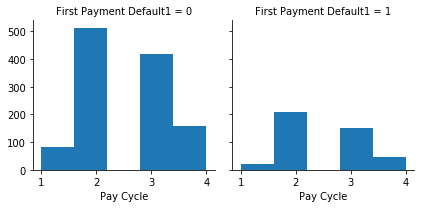

In [103]:
g = sns.FacetGrid(train2, col='First Payment Default1')
g.map(plt.hist, 'Pay Cycle', bins=5)

<Figure size 5760x648 with 0 Axes>

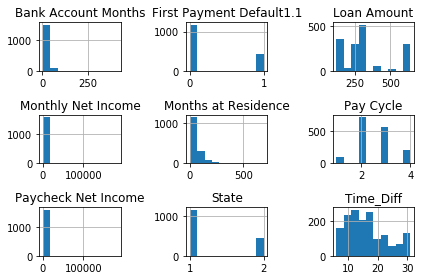

In [33]:
#Histograms
fig=plt.figure(figsize=(80,9))
train2.hist()
plt.tight_layout()
plt.show()
# help to see possible outliers,gaussian,skewed or even exponetial

In [36]:
train2.columns

Index(['State', 'Monthly Net Income', 'Paycheck Net Income', 'Rent or Own',
       'Months at Residence', 'Bank Account Months', 'Pay Cycle',
       'Loan Amount', 'First Payment Default1.1', 'Time_Diff'],
      dtype='object')

## Observing Outliers

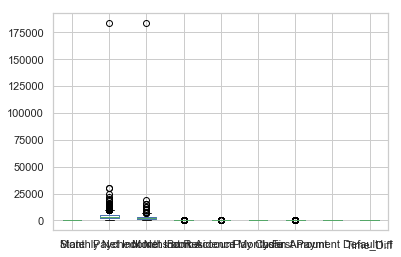

In [361]:
train2.plot.box() 

### Outliers can be ignored in this type of data.

### Remove space in variable names

In [363]:
train2.columns=['State','MonthlyNetIncome','PaycheckNetIncome','RentorOwn','MonthsatResidence','BankAccountMonths',
                'PayCycle','LoanAmount','FirstPaymentDefault','Time_Diff']

In [364]:
train2.head()

,State,MonthlyNetIncome,PaycheckNetIncome,RentorOwn,MonthsatResidence,BankAccountMonths,PayCycle,LoanAmount,FirstPaymentDefault,Time_Diff
0,1,2000.0,2000.0,1,12,6,3,300.00,0,14
1,2,3500.0,3500.0,1,60,60,3,641.91,0,14
2,1,3000.0,3000.0,1,0,6,3,117.65,1,30
3,1,1500.0,1500.0,1,12,6,3,117.65,0,31
4,1,2392.0,598.0,1,130,36,1,300.00,0,10


## Model Fitting

In [365]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [366]:
train2.columns

Index(['State', 'MonthlyNetIncome', 'PaycheckNetIncome', 'RentorOwn',
       'MonthsatResidence', 'BankAccountMonths', 'PayCycle', 'LoanAmount',
       'FirstPaymentDefault', 'Time_Diff'],
      dtype='object')

### Use Linear Regression Model to identify significant variable

In [367]:
results = smf.ols('FirstPaymentDefault ~ State+ MonthlyNetIncome+PaycheckNetIncome+ RentorOwn+ MonthsatResidence+ BankAccountMonths+ PayCycle+ LoanAmount+Time_Diff', data=train2).fit()
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     FirstPaymentDefault   R-squared:                       0.028
Model:                             OLS   Adj. R-squared:                  0.023
Method:                  Least Squares   F-statistic:                     5.181
Date:                 Sat, 22 Jun 2019   Prob (F-statistic):           5.88e-07
Time:                         22:36:23   Log-Likelihood:                -939.65
No. Observations:                 1600   AIC:                             1899.
Df Residuals:                     1590   BIC:                             1953.
Df Model:                            9                                         
Covariance Type:             nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.1399

## Identify significant variables step by step (Backward Selection Method)
### 1. State

In [368]:
results = smf.ols('FirstPaymentDefault ~  MonthlyNetIncome+PaycheckNetIncome+ RentorOwn+ MonthsatResidence+ BankAccountMonths+ PayCycle+ LoanAmount+Time_Diff', data=train2).fit()
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     FirstPaymentDefault   R-squared:                       0.028
Model:                             OLS   Adj. R-squared:                  0.024
Method:                  Least Squares   F-statistic:                     5.832
Date:                 Sat, 22 Jun 2019   Prob (F-statistic):           2.31e-07
Time:                         22:37:01   Log-Likelihood:                -939.66
No. Observations:                 1600   AIC:                             1897.
Df Residuals:                     1591   BIC:                             1946.
Df Model:                            8                                         
Covariance Type:             nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.1388

### 2. RentorOwn

In [369]:
results = smf.ols('FirstPaymentDefault ~  MonthlyNetIncome+PaycheckNetIncome+ MonthsatResidence+ BankAccountMonths+ PayCycle+ LoanAmount+Time_Diff', data=train2).fit()
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     FirstPaymentDefault   R-squared:                       0.028
Model:                             OLS   Adj. R-squared:                  0.024
Method:                  Least Squares   F-statistic:                     6.525
Date:                 Sat, 22 Jun 2019   Prob (F-statistic):           1.31e-07
Time:                         22:37:07   Log-Likelihood:                -940.15
No. Observations:                 1600   AIC:                             1896.
Df Residuals:                     1592   BIC:                             1939.
Df Model:                            7                                         
Covariance Type:             nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.1398

### 3. MonthsatResidence

In [370]:
results = smf.ols('FirstPaymentDefault ~  MonthlyNetIncome+PaycheckNetIncome+ BankAccountMonths+ PayCycle+ LoanAmount+Time_Diff', data=train2).fit()
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     FirstPaymentDefault   R-squared:                       0.028
Model:                             OLS   Adj. R-squared:                  0.024
Method:                  Least Squares   F-statistic:                     7.526
Date:                 Sat, 22 Jun 2019   Prob (F-statistic):           5.67e-08
Time:                         22:37:11   Log-Likelihood:                -940.42
No. Observations:                 1600   AIC:                             1895.
Df Residuals:                     1593   BIC:                             1932.
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.1319

### 4. PayCycle

In [371]:
results = smf.ols('FirstPaymentDefault ~  MonthlyNetIncome+PaycheckNetIncome+ BankAccountMonths+ LoanAmount+Time_Diff', data=train2).fit()
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     FirstPaymentDefault   R-squared:                       0.027
Model:                             OLS   Adj. R-squared:                  0.024
Method:                  Least Squares   F-statistic:                     8.728
Date:                 Sat, 22 Jun 2019   Prob (F-statistic):           3.53e-08
Time:                         22:37:15   Log-Likelihood:                -941.17
No. Observations:                 1600   AIC:                             1894.
Df Residuals:                     1594   BIC:                             1927.
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0943

### 4. PaycheckNetIncome

In [372]:
results = smf.ols('FirstPaymentDefault ~  MonthlyNetIncome+ BankAccountMonths+ LoanAmount+Time_Diff', data=train2).fit()
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     FirstPaymentDefault   R-squared:                       0.025
Model:                             OLS   Adj. R-squared:                  0.023
Method:                  Least Squares   F-statistic:                     10.20
Date:                 Sat, 22 Jun 2019   Prob (F-statistic):           3.71e-08
Time:                         22:37:19   Log-Likelihood:                -942.57
No. Observations:                 1600   AIC:                             1895.
Df Residuals:                     1595   BIC:                             1922.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.1230

### 6. Time_Diff

In [373]:
results = smf.ols('FirstPaymentDefault ~  MonthlyNetIncome+ BankAccountMonths+ LoanAmount', data=train2).fit()
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     FirstPaymentDefault   R-squared:                       0.023
Model:                             OLS   Adj. R-squared:                  0.021
Method:                  Least Squares   F-statistic:                     12.56
Date:                 Sat, 22 Jun 2019   Prob (F-statistic):           4.07e-08
Time:                         22:37:29   Log-Likelihood:                -944.11
No. Observations:                 1600   AIC:                             1896.
Df Residuals:                     1596   BIC:                             1918.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.1727

### Now all P-values are less than 0.05

### Divide train data into X and Y

### State and Loan Amount, Monthly Net Income and Paycheck Net Income are highly corelated variables so one of each pair needs to be replaced.
### Removing State and PaycheckNetIncome from the data frame:

In [374]:
X = train2[['MonthlyNetIncome', 'RentorOwn','MonthsatResidence', 'BankAccountMonths','PayCycle', 'LoanAmount','Time_Diff']]
X.head()

,MonthlyNetIncome,RentorOwn,MonthsatResidence,BankAccountMonths,PayCycle,LoanAmount,Time_Diff
0,2000.0,1,12,6,3,300.00,14
1,3500.0,1,60,60,3,641.91,14
2,3000.0,1,0,6,3,117.65,30
3,1500.0,1,12,6,3,117.65,31
4,2392.0,1,130,36,1,300.00,10


In [375]:
y = train2['FirstPaymentDefault']
y.head()

0    0
1    0
2    1
3    0
4    0
Name: FirstPaymentDefault, dtype: int64

### Split train data into Train and validation set

In [376]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Data analysis using Classifying models

## 1.  Logistic Regression

In [377]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr = logisticRegr.fit(X_train,y_train)

C:\Users\rc_as\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [274]:
score = logisticRegr.score(X_test, y_test)
score

0.7375

### Logistic Regression for significant variables selected from Linear Regression Model(Above)

In [378]:
X = train2[['MonthlyNetIncome', 'BankAccountMonths','PayCycle','LoanAmount','Time_Diff']]
Y = train2['FirstPaymentDefault']
logisticRegr = LogisticRegression()
logisticRegr = logisticRegr.fit(X_train,y_train)
lr = logisticRegr.score(X_test, y_test)
lr

C:\Users\rc_as\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7375

### Even after keeping significant variables there is no change in Accuracy.

## 2. Decision Tree

In [379]:
from sklearn.ensemble import ExtraTreesClassifier
tree = ExtraTreesClassifier()
tree.fit(X_train, y_train)
score1=tree.score(X_train, y_train)
score1

C:\Users\rc_as\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.99453125

In [380]:
dt=tree.score(X_test, y_test)
dt

0.7

## 3. Random Forest

In [381]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
print('Accuracy of RF on training data: {}'.format(rf.score(X_train, y_train)))
rf=rf.score(X_test, y_test)
rf

Accuracy of RF on training data: 0.96015625


C:\Users\rc_as\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.721875

## 4. Support Vector Machine (SVM)

In [382]:
from sklearn.svm import LinearSVC
svm_linear = LinearSVC(penalty ='l1', dual =False)
svm_linear.fit(X_train, y_train)
print('Accuracy of SVM_Linear on training data: {}'.format(svm_linear.score(X_train, y_train)))
svm=svm_linear.score(X_test, y_test)
svm

Accuracy of SVM_Linear on training data: 0.73203125


0.7375

## 5. SVM Radial 

In [383]:
from sklearn.svm import SVC
svm_radial = SVC(kernel='rbf')
svm_radial.fit(X_train, y_train)
Y_pred = svm_radial.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,Y_pred))  
print(classification_report(y_test,Y_pred))

[[233   3]
 [ 77   7]]
              precision    recall  f1-score   support

           0       0.75      0.99      0.85       236
           1       0.70      0.08      0.15        84

   micro avg       0.75      0.75      0.75       320
   macro avg       0.73      0.54      0.50       320
weighted avg       0.74      0.75      0.67       320



C:\Users\rc_as\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [384]:
svmr=svm_radial.score(X_test, y_test)
svmr

0.75

In [385]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Decision Tree','Random Forest','Support Vector Machines',"SVM Radial" ],
    'Score': [lr, dt, rf, svm, svmr]})
models.sort_values(by='Score', ascending=False)

,Model,Score
4,SVM Radial,0.750000
0,Logistic Regression,0.737500
3,Support Vector Machines,0.737500
2,Random Forest,0.721875
1,Decision Tree,0.700000


## Overall, Accuracy of SVM Radial is best(75%)

## Prediction on Test data

In [429]:
predictedData  = pd.read_csv("2018-05-17 - Recruit Sample Data Test.csv")
predictedData.head()

,SetID,Time of Application,State,Monthly Net Income,Paycheck Net Income,Rent or Own,Months at Residence,Bank Account Months,Pay Cycle,Loan Amount,Loan Funded Date,Loan Due Date,Time_Diff
0,1,2018-04-09T23:25:18Z,CA,1894.0,947.0,R,8,30,BiWeekly,300.00,4/10/2018,4/20/2018,10
1,4,2018-04-09T20:34:56Z,TX,5000.0,5000.0,O,36,36,Monthly,642.46,4/10/2018,4/27/2018,17
2,14,2018-04-09T17:41:37Z,TX,2500.0,2500.0,O,108,6,Monthly,644.24,4/9/2018,5/10/2018,31
3,19,2018-04-09T16:33:35Z,CA,2902.0,1451.0,R,48,36,BiWeekly,300.00,4/9/2018,4/20/2018,11
4,28,2018-04-09T14:51:15Z,CA,5000.0,5000.0,R,12,12,Monthly,235.30,4/9/2018,4/30/2018,21


In [430]:
test = predictedData

In [431]:
test.columns

Index(['SetID', 'Time of Application', 'State', 'Monthly Net Income',
       'Paycheck Net Income', 'Rent or Own', 'Months at Residence',
       'Bank Account Months', 'Pay Cycle', 'Loan Amount', 'Loan Funded Date',
       'Loan Due Date', 'Time_Diff'],
      dtype='object')

In [434]:
test=test[['Monthly Net Income','Rent or Own','Months at Residence','Bank Account Months','Pay Cycle','Loan Amount','Time_Diff']] 

In [438]:
test.columns=['MonthlyNetIncome','RentOrOwn','MonthsAtResidence','BankAccountMonths', 'PayCycle', 'LoanAmount','Time_Diff']

In [439]:
mymap1 ={'R':1, 'O':'2', 'Weekly':1,'BiWeekly':2,'Monthly':3,'BiMonthly':4}
test = test.applymap(lambda s: mymap1.get(s) if s in mymap1 else s)
test.head()

,MonthlyNetIncome,RentOrOwn,MonthsAtResidence,BankAccountMonths,PayCycle,LoanAmount,Time_Diff
0,1894.0,1,8,30,2,300.00,10
1,5000.0,2,36,36,3,642.46,17
2,2500.0,2,108,6,3,644.24,31
3,2902.0,1,48,36,2,300.00,11
4,5000.0,1,12,12,3,235.30,21


In [440]:
Y = test

## SVM Radial for Prediction

In [441]:
predictedData['FirstPaymentDefault'] = svm_radial.predict(Y)
predictedData.head(10)

,SetID,Time of Application,State,Monthly Net Income,Paycheck Net Income,Rent or Own,Months at Residence,Bank Account Months,Pay Cycle,Loan Amount,Loan Funded Date,Loan Due Date,Time_Diff,FirstPaymentDefault
0,1,2018-04-09T23:25:18Z,CA,1894.0,947.0,R,8,30,BiWeekly,300.00,4/10/2018,4/20/2018,10,0
1,4,2018-04-09T20:34:56Z,TX,5000.0,5000.0,O,36,36,Monthly,642.46,4/10/2018,4/27/2018,17,0
2,14,2018-04-09T17:41:37Z,TX,2500.0,2500.0,O,108,6,Monthly,644.24,4/9/2018,5/10/2018,31,0
3,19,2018-04-09T16:33:35Z,CA,2902.0,1451.0,R,48,36,BiWeekly,300.00,4/9/2018,4/20/2018,11,0
4,28,2018-04-09T14:51:15Z,CA,5000.0,5000.0,R,12,12,Monthly,235.30,4/9/2018,4/30/2018,21,0
5,37,2018-04-09T13:01:38Z,CA,3500.0,1750.0,R,12,12,BiMonthly,300.00,4/9/2018,4/25/2018,16,0
6,41,2018-04-09T12:02:01Z,CA,3000.0,1500.0,R,120,30,BiMonthly,235.30,4/9/2018,4/27/2018,18,0
7,45,2018-04-09T11:37:54Z,CA,5000.0,2500.0,O,108,6,BiWeekly,117.65,4/9/2018,4/18/2018,9,0
8,46,2018-04-09T11:34:34Z,CA,1820.0,910.0,R,12,36,BiWeekly,117.65,4/9/2018,4/27/2018,18,0
9,51,2018-04-09T11:06:47Z,TX,3000.0,3000.0,R,24,24,Monthly,641.91,4/9/2018,4/23/2018,14,0


In [443]:
mymap ={0:False, 1:True}
predictedData= predictedData.applymap(lambda s: mymap.get(s) if s in mymap else s)
predictedData.head(10)

,SetID,Time of Application,State,Monthly Net Income,Paycheck Net Income,Rent or Own,Months at Residence,Bank Account Months,Pay Cycle,Loan Amount,Loan Funded Date,Loan Due Date,Time_Diff,FirstPaymentDefault
0,True,2018-04-09T23:25:18Z,CA,1894.0,947.0,R,8,30,BiWeekly,300.00,4/10/2018,4/20/2018,10,False
1,4,2018-04-09T20:34:56Z,TX,5000.0,5000.0,O,36,36,Monthly,642.46,4/10/2018,4/27/2018,17,False
2,14,2018-04-09T17:41:37Z,TX,2500.0,2500.0,O,108,6,Monthly,644.24,4/9/2018,5/10/2018,31,False
3,19,2018-04-09T16:33:35Z,CA,2902.0,1451.0,R,48,36,BiWeekly,300.00,4/9/2018,4/20/2018,11,False
4,28,2018-04-09T14:51:15Z,CA,5000.0,5000.0,R,12,12,Monthly,235.30,4/9/2018,4/30/2018,21,False
5,37,2018-04-09T13:01:38Z,CA,3500.0,1750.0,R,12,12,BiMonthly,300.00,4/9/2018,4/25/2018,16,False
6,41,2018-04-09T12:02:01Z,CA,3000.0,1500.0,R,120,30,BiMonthly,235.30,4/9/2018,4/27/2018,18,False
7,45,2018-04-09T11:37:54Z,CA,5000.0,2500.0,O,108,6,BiWeekly,117.65,4/9/2018,4/18/2018,9,False
8,46,2018-04-09T11:34:34Z,CA,1820.0,910.0,R,12,36,BiWeekly,117.65,4/9/2018,4/27/2018,18,False
9,51,2018-04-09T11:06:47Z,TX,3000.0,3000.0,R,24,24,Monthly,641.91,4/9/2018,4/23/2018,14,False


In [446]:
predictedData['FirstPaymentDefault'].value_counts()

False    395
True       5
Name: FirstPaymentDefault, dtype: int64

###  Hence in test data set there are 395 True and and 5 False predictions using SVM Radial model.